#    Milestone 11: Spatial decorrelation in stereo audio signals

La implementación de este hito consistrá en la implementación de una clase llamada Spatial_decorrelation, dicha clase esta compuesta por cuatro métodos, MST_analyze, MST_synthesize, pack y unpack.

In [ ]:
# Analysis transform:
#
#  [w[0]] = [1  1] [x[0]]
#  [w[1]]   [1 -1] [x[1]]

def MST_analyze(x):
    w = np.empty_like(x, dtype=np.int32)
    w[:, 0] = x[:, 0].astype(np.int32) + x[:, 1] # L(ow frequency subband)
    w[:, 1] = x[:, 0].astype(np.int32) - x[:, 1] # H(igh frequency subband)
    return w

El metodo MST_synthesize aplica la transformación inversa al chunk recibido.

In [ ]:
# Inverse transform:
#
#  [x[0]] = 1/2 [1  1] [w[0]]
#  [x[1]]       [1 -1] [w[1]]

def MST_synthesize(w):
    x = np.empty_like(w, dtype=np.int16)
    x[:, 0] = (w[:, 0] + w[:, 1])/2 # L(ow frequency subband)
    x[:, 1] = (w[:, 0] - w[:, 1])/2 # H(igh frequency subband)
    return x

In [ ]:
Aplicamos el Analysis transform al chunk y despues lo empaqueta

In [ ]:
def pack(self, chunk_number, chunk):
        analyzed_chunk = self.MST_analyze(chunk)
        return super().pack(chunk_number, analyzed_chunk)

Ahora se hace lo contrario, se desempaquet el chunk y se le  aplicacion Inverse transform para volverlo a su estado original

In [ ]:
def unpack(self, packed_chunk, dtype=minimal.Minimal.SAMPLE_TYPE):
        chunk_number, chunk = super().unpack(packed_chunk, dtype)
        synthesize_chunk = self.MST_synthesize(chunk)
        return chunk_number, synthesize_chunk

Para responder a la pregunta "Has the compression ratio been improved (on average)? How much?"

Hemos realizado dos pruebas, la primera fue reproducir un sonido desde el propio portatil y hemos obtenido los siguiente resultado en average

In [ ]:
Con la clase br_control, average = 278.57 y spatial, average = 242.83, si hacemos la resta obtenemos 35,74 kilo bits/s

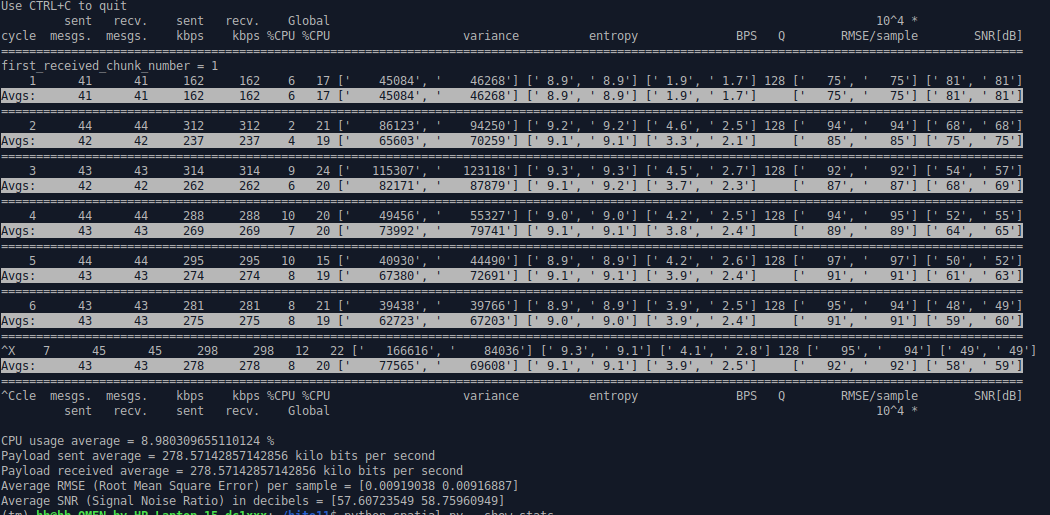

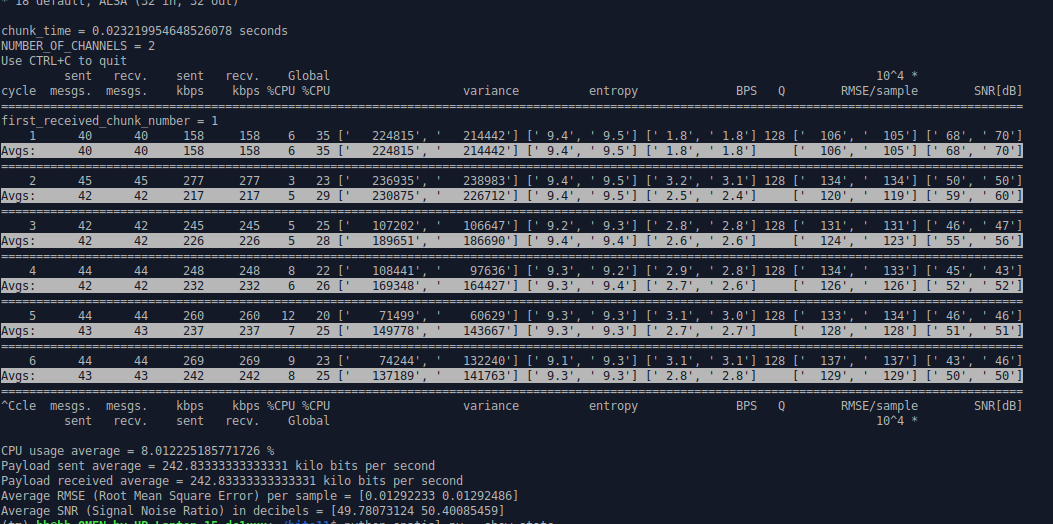

Hemos realizado dos pruebas, la segunda fue reproducir un sonido desde el propio exterior y hemos obtenido los siguiente resultado en average

In [ ]:
Con la clase br_control, average = 382.5 y spatial, average = 339.83, si hacemos la resta obtenemos 42.67 kilo bits/s

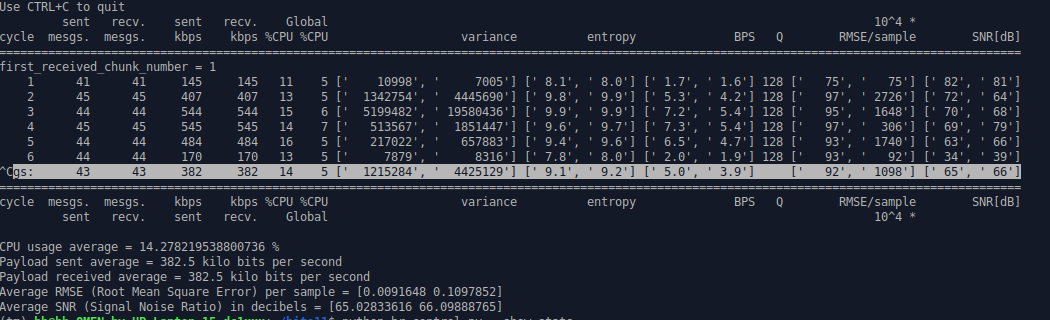

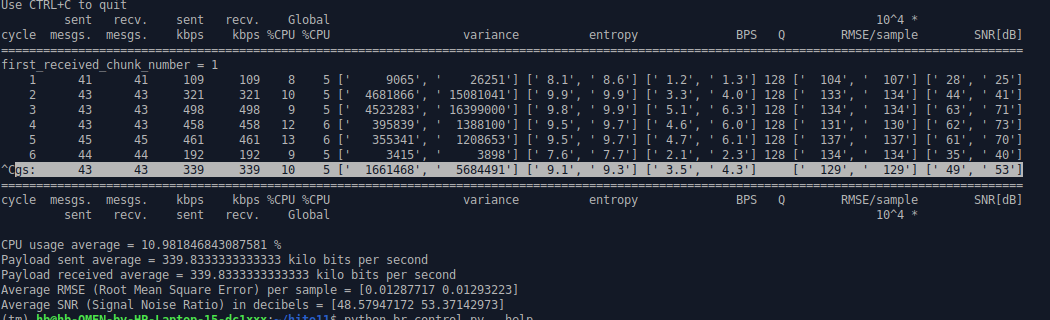